<a href="https://colab.research.google.com/github/snehanshastri/AI/blob/main/Simulated_Annealing_N_Queens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install mlrose-hiive


In [7]:
!pip install joblib


In [9]:
!pip install joblib==1.2.0 # Install the joblib version 1.2.0 that contains the my_exceptions module

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2


In [6]:
import mlrose_hiive as mlrose
import numpy as np

# Define the objective function
def queens_max(position):
    no_attack_on_j = 0
    queen_not_attacking = 0
    for i in range(len(position) - 1):
        no_attack_on_j = i
        for j in range(i + 1, len(position)):
            if (position[j] != position[i] and
                position[j] != position[i] + (j - i) and
                position[j] != position[i] - (j - i)):
                no_attack_on_j += 1
            if (no_attack_on_j == len(position) - i - 1):
                queen_not_attacking += 1
    if(queen_not_attacking == 7):
        queen_not_attacking += 1
    return queen_not_attacking

# Define the fitness function
objective = mlrose.CustomFitness(queens_max)

# Define the optimization problem
problem = mlrose.DiscreteOpt(length=8, fitness_fn=objective, maximize=True, max_val=8)

# Define the annealing schedule and other parameters
T = mlrose.ExpDecay()
initial_position = np.array([4, 6, 1, 5, 2, 0, 3, 7])

# Run simulated annealing, assigning the extra return value to _
best_position, best_objective, _ = mlrose.simulated_annealing(problem=problem, schedule=T,max_attempts=500, max_iters=1000, init_state=initial_position)

# Print the results
print("The best position found is:", best_position)
print("The number of queens that are not attacking each other is:", best_objective)

The best position found is: [6 1 3 7 6 2 7 3]
The number of queens that are not attacking each other is: 8.0


The best position found is: [5 7 0 4 6 4 4 0]
The number of queens that are not attacking each other is: 9.0


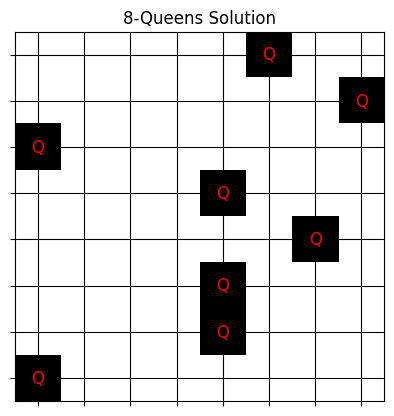

In [11]:

import matplotlib.pyplot as plt
import numpy as np
import mlrose_hiive as mlrose

# ... (Your existing code for the 8-queens problem) ...
import mlrose_hiive as mlrose
import numpy as np

# Define the objective function
def queens_max(position):
    no_attack_on_j = 0
    queen_not_attacking = 0
    for i in range(len(position) - 1):
        no_attack_on_j = i
        for j in range(i + 1, len(position)):
            if (position[j] != position[i] and
                position[j] != position[i] + (j - i) and
                position[j] != position[i] - (j - i)):
                no_attack_on_j += 1
            if (no_attack_on_j == len(position) - i - 1):
                queen_not_attacking += 1
    if(queen_not_attacking == 7):
        queen_not_attacking += 1
    return queen_not_attacking

# Define the fitness function
objective = mlrose.CustomFitness(queens_max)

# Define the optimization problem
problem = mlrose.DiscreteOpt(length=8, fitness_fn=objective, maximize=True, max_val=8)

# Define the annealing schedule and other parameters
T = mlrose.ExpDecay()
initial_position = np.array([4, 6, 1, 5, 2, 0, 3, 7])

# Run simulated annealing, assigning the extra return value to _
best_position, best_objective, _ = mlrose.simulated_annealing(problem=problem, schedule=T,max_attempts=500, max_iters=1000, init_state=initial_position)

# Print the results
print("The best position found is:", best_position)
print("The number of queens that are not attacking each other is:", best_objective)

# Function to visualize the solution on a chessboard
def visualize_queens(positions):
    """Visualizes the solution on a chessboard.

    Args:
        positions: A list or array representing the positions of the queens.
    """
    board_size = len(positions)
    board = np.zeros((board_size, board_size), dtype=int)

    for i, pos in enumerate(positions):
        board[i, pos] = 1  # Place queen (1) on the board

    # Create the chessboard visualization
    fig, ax = plt.subplots()
    ax.imshow(board, cmap='binary')  # Use binary colormap for black and white

    # Add grid lines and labels
    ax.set_xticks(np.arange(board_size))
    ax.set_yticks(np.arange(board_size))
    ax.set_xticklabels([])  # Remove x-axis labels
    ax.set_yticklabels([])  # Remove y-axis labels
    ax.grid(True, color='black')

    # Add queen markers (optional)
    for i, pos in enumerate(positions):
        ax.text(pos, i, 'Q', ha='center', va='center', color='red', fontsize=12)

    plt.title("8-Queens Solution")
    plt.show()

# Visualize the best solution
visualize_queens(best_position)

Best state (Queen positions): [5, 2, 6, 1, 3, 7, 0, 4], Number of conflicts: 0


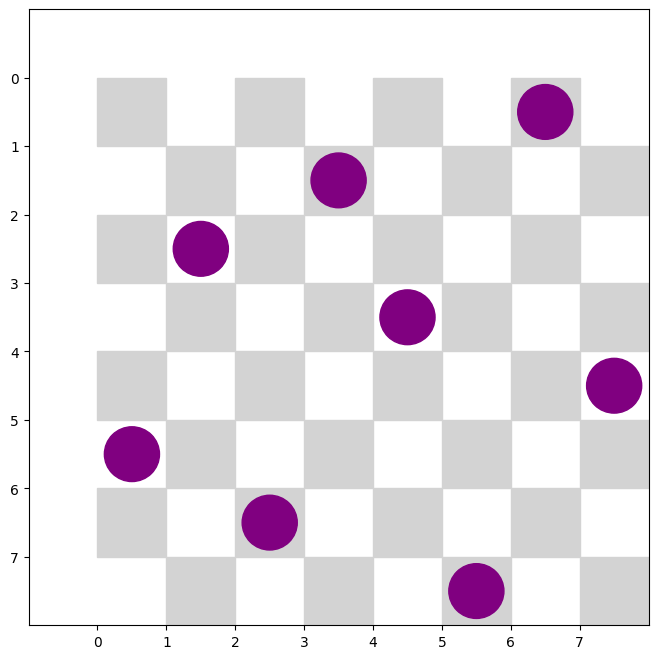

In [22]:
import random
import math
import matplotlib.pyplot as plt

# Generate an initial solution with unique columns for each queen
def create_initial_solution(n):
    return random.sample(range(n), n)  # A permutation of column indices (unique columns)

# Calculate the number of diagonal conflicts
def calculate_fitness(state):
    diagonal_conflicts = 0
    n = len(state)

    for i in range(n):
        for j in range(i + 1, n):
            if abs(state[i] - state[j]) == abs(i - j):  # Check if they are on the same diagonal
                diagonal_conflicts += 1

    return diagonal_conflicts

# Generate a neighboring solution by swapping two columns
def random_neighbor(state):
    neighbor = state[:]
    i, j = random.sample(range(len(state)), 2)  # Pick two different rows to swap
    neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
    return neighbor

# Simulated Annealing Algorithm
def simulated_annealing(n, initial_temp=1000, cooling_rate=0.95, max_iterations=1000):
    current_solution = create_initial_solution(n)
    current_fitness = calculate_fitness(current_solution)
    best_solution = current_solution
    best_fitness = current_fitness
    temperature = initial_temp

    for iteration in range(max_iterations):
        neighbor = random_neighbor(current_solution)
        neighbor_fitness = calculate_fitness(neighbor)

        fitness_diff = neighbor_fitness - current_fitness

        # Accept the neighbor if it improves the solution or based on the annealing probability
        if fitness_diff < 0 or random.uniform(0, 1) < math.exp(-fitness_diff / temperature):
            current_solution = neighbor
            current_fitness = neighbor_fitness

            # Update the best solution if the current one is better
            if current_fitness < best_fitness:
                best_solution = current_solution
                best_fitness = current_fitness

        # Cool down the temperature
        temperature *= cooling_rate

    return best_solution, best_fitness

# Visualize the chessboard and queens
def plot_solution(solution):
    n = len(solution)
    plt.figure(figsize=(n, n))
    plt.xlim(-1, n)
    plt.ylim(-1, n)

    # Draw the chessboard
    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, color='lightgrey'))

    # Place the queens
    for col, row in enumerate(solution):
        plt.gca().add_patch(plt.Circle((col + 0.5, row + 0.5), 0.4, color='purple'))

    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.gca().invert_yaxis()
    plt.grid(False)
    plt.show()

# Parameters
n = 8  # Number of queens
best_solution, best_fitness = simulated_annealing(n)

# Output results
print(f"Best state (Queen positions): {best_solution}, Number of conflicts: {best_fitness}")

# Plot the solution
plot_solution(best_solution)
